# Python 視覺化工具

- matplotlib 繪圖套件
- seaborn 繪圖套件
    - 安裝指令
        ```bash=
            !pip install seaborn
        ```
- OpenCV 影像處理套件 (CV: Computer Vision)
    - 安裝指令
        ```bash=
            !pip install opencv-python
        ```

In [ ]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

%matplotlib inline

## 案例一：數學函數

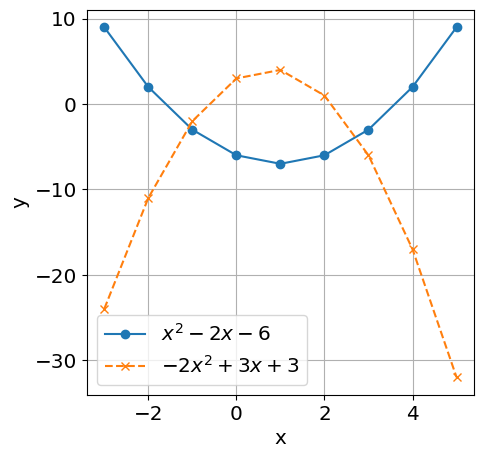

In [ ]:
f = lambda x : x ** 2 - 2 * x - 6
g = lambda x : -2 * x ** 2 + 3 * x + 3

x_domain = range(-3, 6)
y1 = [ f(x) for x in x_domain ]
y2 = [ g(x) for x in x_domain ]

plt.figure(figsize = (5, 5))
plt.plot(x_domain, y1, marker = "o")
plt.plot(x_domain, y2, marker = "x", linestyle = "--")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["$x^2-2x-6$", "$-2x^2+3x+3$"])

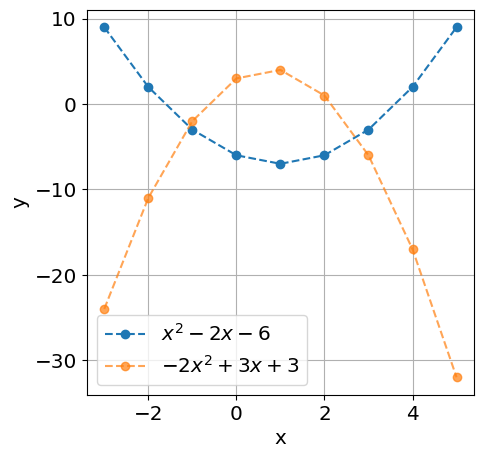

In [ ]:
f = lambda x : x ** 2 - 2 * x - 6
g = lambda x : -2 * x ** 2 + 3 * x + 3

x = range(-3, 6)
y1 = [f(i) for i in x]
y2 = [g(i) for i in x]

plt.figure(figsize = (5, 5))
plt.plot(x, y1, "o--")
plt.plot(x, y2, "o--", alpha = 0.7)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["$x^2 - 2x - 6$", "$-2x^2 + 3x + 3$"])

plt.savefig("example1.jpg", dpi = 300)

### 課堂練習

- 考慮 $x = [-3,  +3]$，繪製下列四個函數圖形：
    - $y = \log_{10} x$
    - $y = x$
    - $y = x ^ 2$
    - $y = x ^ 3$

## 案例二：蒙地卡羅模擬

- 根據需要，可以自己挑不同的配色，即改變色域 (colormap)。
    - https://matplotlib.org/stable/tutorials/colors/colors.html
    - https://matplotlib.org/stable/tutorials/colors/colormaps.html

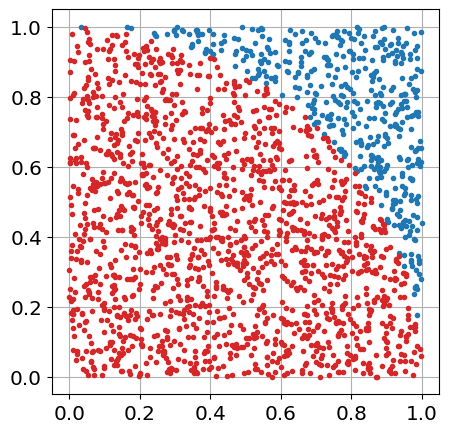

In [ ]:
import random

N = 2000

plt.figure(figsize = (5, 5))
for i in range(N):

    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    if x ** 2 + y ** 2 < 1:
        plt.plot(x, y, marker = ".", color = "tab:red")
    else:
        plt.plot(x, y, marker = ".", color = "tab:blue")

plt.grid(True)
plt.savefig("example2.pdf", dpi = 300)

### 課堂練習
- 為 $x^2 + y^2 < 1$ 加上黃色的實線。
    - 如何算出圓上的 $(x, y)$ 的所有組合。

## 案例三：直方圖 (Histogram)

- 利用 random 的工具箱產生不同分佈的資料。
    - 查閱 https://docs.python.org/zh-tw/3/library/random.html

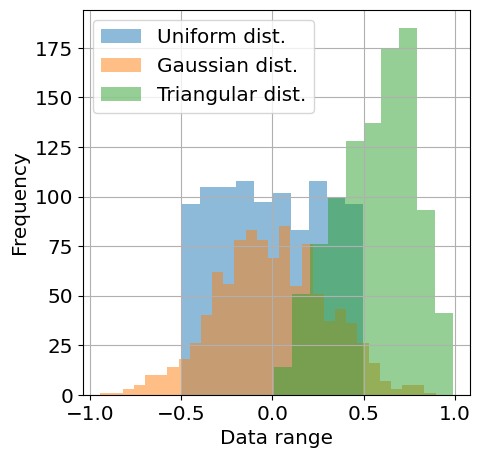

In [ ]:
import random

N = 1000
data1 = [random.uniform(-0.5, 0.5) for _ in range(N)]
data2 = [random.gauss(0, 0.3) for _ in range(N)]
data3 = [random.triangular(0, 1, 0.7) for _ in range(N)]

plt.figure(figsize = (5, 5))
plt.hist(data1, bins = 10, alpha = 0.5)
plt.hist(data2, bins = 30, alpha = 0.5)
plt.hist(data3, bins = 10, alpha = 0.5)
plt.grid(True)
plt.ylabel("Frequency")
plt.xlabel("Data range")
plt.legend(["Uniform dist.", "Gaussian dist.", "Triangular dist."])

plt.savefig("example3.jpg", dpi = 300)

## 案例四：升級繪圖模板

- 官方文件：https://seaborn.pydata.org/tutorial/introduction.html
- 利用 seaborn 套件可以進一步美化 matlabplot 的結果。

In [ ]:
import seaborn as sns

sns.set_theme(style = "darkgrid")

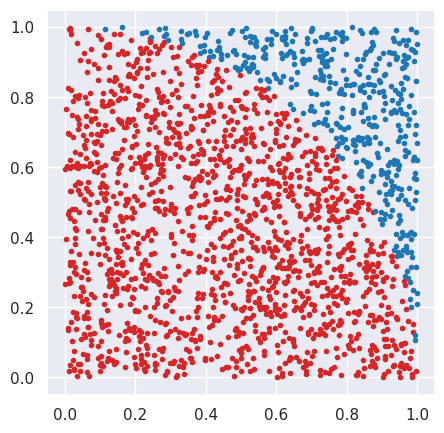

In [ ]:
N = 2000

plt.figure(figsize = (5, 5))
for i in range(N):

    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    if x ** 2 + y ** 2 < 1:
        plt.plot(x, y, marker = ".", color = "tab:red")
    else:
        plt.plot(x, y, marker = ".", color = "tab:blue")

plt.grid(True)
plt.savefig("example4.jpg", dpi = 300)

- 更多的圖形樣板可以參考：https://seaborn.pydata.org/examples/index.html

## 案例五：讀圖檔

- https://github.com/opencv/opencv-python

In [ ]:
!wget https://dynamic-media-cdn.tripadvisor.com/media/photo-o/04/62/e9/2b/101.jpg?w=1200&h=1200&s=1

--2023-08-23 04:24:54--  https://dynamic-media-cdn.tripadvisor.com/media/photo-o/04/62/e9/2b/101.jpg?w=1200
Resolving dynamic-media-cdn.tripadvisor.com (dynamic-media-cdn.tripadvisor.com)... 184.29.176.16
Connecting to dynamic-media-cdn.tripadvisor.com (dynamic-media-cdn.tripadvisor.com)|184.29.176.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71464 (70K) [image/jpeg]
Saving to: ‘101.jpg?w=1200’

101.jpg?w=1200      100%[===================>]  69.79K  --.-KB/s    in 0.05s   

2023-08-23 04:24:54 (1.47 MB/s) - ‘101.jpg?w=1200’ saved [71464/71464]



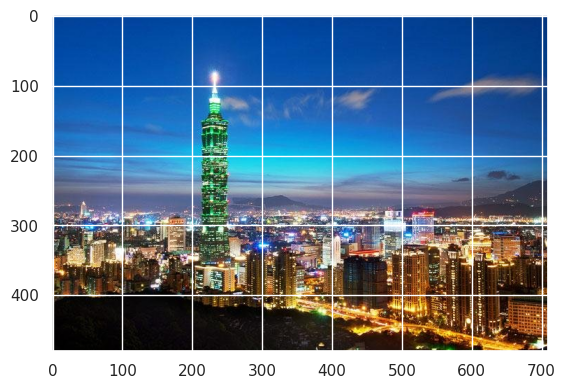

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread("101.jpg")
plt.imshow(img)
plt.show()

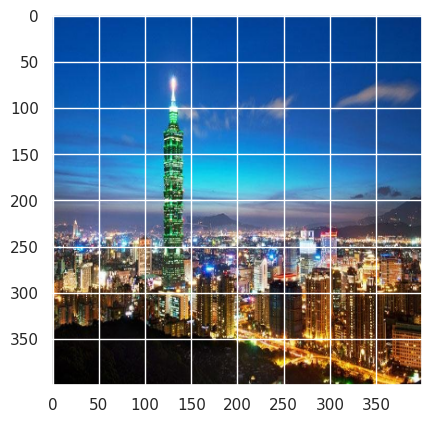

In [ ]:
import cv2

im = cv2.imread("101.jpg")
im_resized = cv2.resize(im, (400, 400), interpolation = cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()